# Will we all be replaced by bots?

It is a very hot topic recently about the power of AIs and whether we need to learn to code when a computer can do a lot automatically. I would say that's not the situation, but also we shouldn't just ignore it! In this section we'll look at where it can be useful, and where it can make errors that only you (a human!) can identify. 

Our objective as researchers is to find results, not to punish ourselves unnecceserily! 

---


## Read the manual for me 

Coding can be hard. Even though we have got very good at the fundementals this week and advanced a lot, there is a lot of complexity out there. The Python documentation in the world is very strong and well written and it's quite easy to find reference material for everything you need to know.

However, python works with lots of libraries and packages written by third parties and these aren't always as well documented. I had the idea for this session whilst writing the bioypthon modules session and after trying to remember the exact name of the ```qualifiers``` biopython method and searching the Biopython manual for ages, that I went to chatGPT and it gave me the word/syntax I couldn't remember immediately by me saying "what's the biopython option for getting just the gene feature names". In this situation, it is like a super-powered google search.

(I challange you to look through the manual and find the name of the method to return the features http://biopython.org/DIST/docs/tutorial/Tutorial.html. It's not easy to find!)

First lets try something simple:

> chatGPT: "How do I filter a dictionary for just values over 100?"




In [64]:
## CHAT GPT GENERATED CODE ##

my_dict = {"A": 50, "B": 120, "C": 80, "D": 200, "E": 90}

filtered_dict = {key: value for key, value in my_dict.items() if value > 100}

print(filtered_dict)

{'B': 120, 'D': 200}


That's pretty good. Nice clear code and it also comes with some test data. There's also some text to go along with it, but just repeating the code so I left it out. 

Although perhaps I don't want to be using dictionary comprehensions, as I'm not as comfortable with them and also I want to include more lines in my loop anyway:


> chatGPT: "write it not as a comprehension"

In [65]:
## CHAT GPT GENERATED CODE ##

my_dict = {"A": 50, "B": 120, "C": 80, "D": 200, "E": 90}

filtered_dict = {}
for key, value in my_dict.items():
    if value > 100:
        filtered_dict[key] = value

print(filtered_dict)

{'B': 120, 'D': 200}


Nice. I can read that better, and also as I had secondary plans for modifying the values I can edit it further.

---

Lets look at what happens if we ask it to work with biopython for us:

>  "I am using the biopython SeqIO module. What function do I use to output the gene features?"

In [ ]:
## This is because we need to use it in this section  - ChatGPT didn't say this line
!pip install biopython

In [63]:
## CHAT GPT GENERATED CODE ##

from Bio import SeqIO

# Read the sequence record from a file
record = SeqIO.read("sequence.fasta", "fasta")

# Access the gene features
gene_features = []
for feature in record.features:
    if feature.type == "gene":
        gene_features.append(feature)

# Print the gene features
for gene in gene_features:
    print("Gene:", gene.qualifiers['gene'][0])
    print(f"Start: {gene.location.start}")
    print(f"End: {gene.location.end}")
    print(f"Strand: {gene.location.strand}")

### Exercise - Assess the output
What is going on here? Would the code work? I can see at least two big errors in the response!

But also it has made me realise/remember two important things about getting the features information from a SeqRecord that I can use for my code.

Perhaps outside this session you could try to fix this codeblock, but for now lets just think about the concept.

---


## New module prototyping

There are a lot of modules and libraries out there, and often it's hard to know if they will do the thing you want. It can also take a whole day to understand how to make a basic output given the number of parameters to learn.

Someone mentioned being interested in image processing with Python in the pre-course survey. It's not something I have experience with, so I decided to ask chatGPT what module it would recomend, and to give me an example. In classdata we have an image from a Ficus plant epidermis, which I want to know how many cells there are.

This is an example of some quickly generated code for a library I don't know, made with some help from chatGPT. I'll just put the multiple responses and code first, and discuss it after:


> Query: "Write some python code to count the number of cells in a microscopy image"

In [85]:
my_image = '/content/SAM_image.jpg'

In [1]:
import cv2

# Load the cell image
image = cv2.imread(my_image, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to segment the cells
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours of the cells
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of cells
cell_count = len(contours)

# Print the cell count
print("Number of cells:", cell_count)

ModuleNotFoundError: No module named 'cv2'

> Query: "It's predicting too many cells"


In [ ]:
response: """To improve the accuracy of cell counting in a microscopy image, you can consider applying additional image
 processing techniques. One common approach is to apply morphological operations, such as erosion and dilation, to refine
 the binary image before detecting the contours. Here's an updated version of the code that includes morphological operations:"""

In [87]:
import cv2
import numpy as np

# Load the microscopy image
image = cv2.imread(my_image, 0)  # Load as grayscale

# Apply thresholding to segment the cells
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations to refine the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Find contours of the cells
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of cells
cell_count = len(contours)

# Print the cell count
print("Number of cells:", cell_count)


Number of cells: 165


> Query: "I want a graphical output with the cell count overlaid"

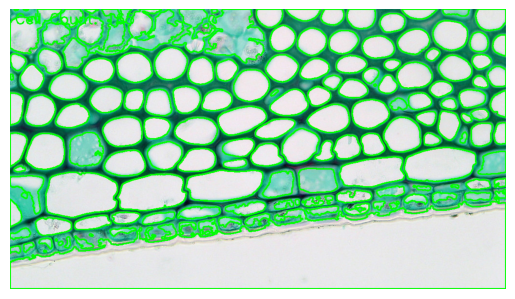

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the microscopy image
image = cv2.imread(my_image)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the cells
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations to refine the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Find contours of the cells
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of cells
cell_count = len(contours)

# Draw contours and cell count on the image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
cv2.putText(image, f"Cell Count: {cell_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Convert BGR image to RGB for matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with overlays
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



> Query: "Plot the individual cell numbers on each cell"

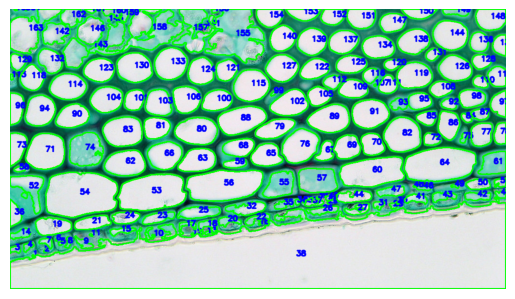

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the microscopy image
image = cv2.imread(my_image)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the cells
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations to refine the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Find contours of the cells
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the image and annotate with cell numbers
for i, contour in enumerate(contours):
    # Draw contour
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    
    # Get contour centroid
    M = cv2.moments(contour)
    centroid_x = int(M['m10'] / M['m00'])
    centroid_y = int(M['m01'] / M['m00'])
    
    # Annotate with cell number
    cv2.putText(image, str(i+1), (centroid_x, centroid_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)

# Convert BGR image to RGB for matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with overlays
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



(Note: I skipped some code where it didn't understand me)

Well! That grew quite quickly and gives me quite a good feeling about the package. I don't know what a lot of the code and functions did, but I'm now satisfied that it's pretty good at identifying cells, and I think I'll spend some time looking at the manual and working out how to use it properly. 

This isn't a substitute for learning how to write the code, but the AI knows the manual better than any guide I can find with google (Challenge, find a tutorial that can teach you using CV2 for cell counting). It can be a very powerful way to kick start your understanding of a new library.


---

## Why isn't my code working?
There is another powerful way that AI can help, and that is identifying what is wrong with your code. I don't have much experience with this as my code works perfectly every time of course, but lets look at the response to some of the "BugFix" examples I gave you on day 1.

> Query: "Why is the following code not working?"

In [ ]:
# Our gene as a list of bases
my_insert = ['C', 'A', 'T', 'G', 'C', 'G', 'T', 'A', 'T', 'A', 'T', 'G', 'C', 'C', 'A', 'T', 'C', 'G']

# Get last base
length = len(my_insert)
last_base = my_inser[length]

print(last_base)

# Remove all N's
my_insert.remove("N")

print(my_insert)

---

**Response**

The error in your code is on this line:
```
last_base = my_inser[length]
```
You have a typo in the variable name. It should be my_insert instead of ```my_inser```. Update that line to:
```
last_base = my_insert[length - 1]
```
This will correctly access the last base of the my_insert list.

Here's the corrected code:
```
(The full corrected code)
```
---

This is obviously quite powerful. It not only saw the typo with the variable, but it also notice the off-by-one error that would appear because the size of the list starts counting at 1, but the index function starts at 0. 

However, note that it didn't explain the change to ```-length - 1```. Be very careful to not just copy/paste random pieces of code which it generates, because just like above, it can very easily misunderstand the objective and totally change your outputs!

## Summary

The objective of this session is not to prove that learning coding is not worth it, and it is essential to have the ability to understand and write the code because otherwise you couldn't be confident in any outputs from these tools. These are just tools and not scientists and don't have the comprehension and understanding of the data and process that you have!

However, it would be unrealistic to pretend these tools don't exist and are making a difference in how data analysis is being performed. This course is not here to test your coding skill for the sake of it, but to teach and prepare you for the real situation of coding for your research and if AI bots allow you to spend less time struggling and more time doing cool science, then that can only be a good thing!

But don't let them replace actually gaining the skills yourself!